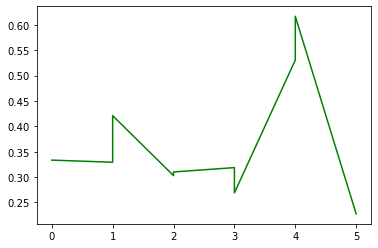

created_at
2021-01-10 00:37:49+00:00    False
2021-01-10 00:38:16+00:00     True
2021-01-10 00:38:43+00:00     True
2021-01-10 00:38:52+00:00    False
2021-01-10 00:39:02+00:00     True
                             ...  
2021-01-10 05:04:42+00:00     True
2021-01-10 05:04:50+00:00    False
2021-01-10 05:04:52+00:00     True
2021-01-10 05:05:17+00:00    False
2021-01-10 05:05:28+00:00    False
Name: burger_king, Length: 1000, dtype: bool


'“I got Burger King and everything I had tasted like lady bugs” -@bai_leyd     @BurgerKing 🤔🤔'

In [133]:
import json
import pandas as pd
import numpy as np


file = json.loads(open('food1.json').read())
tweets_list = []
for tweet in file:
    if 'extended_tweet' in tweet:
        tweet['extended_tweet-text'] = tweet['extended_tweet']['full_text']
    if 'quoted_status' in tweet:
        tweet['quoted_status-text'] = tweet['quoted_status']['text']
        if 'extended_tweet' in tweet['quoted_status']:
            tweet['quoted_status-extended_tweet-text'] = tweet['quoted_status']['extended_tweet']['full_text']
    if 'retweeted_status' in tweet:
        tweet['retweeted_status-text'] = tweet['retweeted_status']['text']
        if 'extended_tweet' in tweet['retweeted_status']:
            tweet['retweeted_status-extended_tweet-text'] = tweet['retweeted_status']['extended_tweet']['full_text']
    tweets_list.append(tweet)
    
table = pd.DataFrame(tweets_list)
table['created_at'] = pd.to_datetime(table['created_at'])
table = table.set_index('created_at')
    
holding = table['text'].str.contains('#BurgerKing|@BurgerKing', case=False)
for col in ['extended_tweet-text','quoted_status-text','quoted_status-extended_tweet-text','retweeted_status-text','retweeted_status-extended_tweet-text']:
    holding = holding | table[col].str.contains('#BurgerKing|@BurgerKing', case=False)
    totalcount = np.sum(holding)
table['burger_king'] = holding
word_mention = table['burger_king'].resample('30 min').mean()
plt.plot(word_mention.index.hour, word_mention, color='green')
plt.show()
print(table['burger_king'])
table['text'][6]

In [122]:
import nltk 
nltk.download('popular')


[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\hienn\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     C:\Users\hienn\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gazetteers.zip.
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     C:\Users\hienn\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\genesis.zip.
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     C:\Users\hienn\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\gutenberg.zip.
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     C:\Users\hienn\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\hienn\AppData\Roaming\nl

True

In [135]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\hienn\AppData\Roaming\nltk_data...


True

In [161]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sen = SentimentIntensityAnalyzer()
sentiment_scores = table['text'].apply(sen.polarity_scores)
sentimentcompoundscore = sentiment_scores.apply(lambda x:x['compound'])
sentimentcompoundscore[table['burger_king']].resample('60 min').mean()

created_at
2021-01-10 00:00:00+00:00    0.240597
2021-01-10 01:00:00+00:00    0.100364
2021-01-10 02:00:00+00:00    0.188591
2021-01-10 03:00:00+00:00    0.127082
2021-01-10 04:00:00+00:00    0.073893
2021-01-10 05:00:00+00:00    0.031040
Freq: 60T, Name: text, dtype: float64

1000

In [206]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sen = SentimentIntensityAnalyzer()

def read_Tweet(filename):
    tweets_list = []
    for m in filename:
        file = json.loads(open(m).read())
        for tweet in file:
            if 'extended_tweet' in tweet:
                tweet['extended_tweet-text'] = tweet['extended_tweet']['full_text']
            if 'quoted_status' in tweet:
                tweet['quoted_status-text'] = tweet['quoted_status']['text']
                if 'extended_tweet' in tweet['quoted_status']:
                    tweet['quoted_status-extended_tweet-text'] = tweet['quoted_status']['extended_tweet']['full_text']
            if 'retweeted_status' in tweet:
                tweet['retweeted_status-text'] = tweet['retweeted_status']['text']
                if 'extended_tweet' in tweet['retweeted_status']:
                    tweet['retweeted_status-extended_tweet-text'] = tweet['retweeted_status']['extended_tweet']['full_text']
            tweets_list.append(tweet)

    table = pd.DataFrame(tweets_list)
    table['created_at'] = pd.to_datetime(table['created_at'])
    table = table.set_index('created_at')
    a = table.shape
    print(a)
    return table

def word_mention_checking(wordslist, table):
    proportions = []
    for word in wordslist:
        holding = table['text'].str.contains(word, case=False)
        for col in ['extended_tweet-text','quoted_status-text','quoted_status-extended_tweet-text','retweeted_status-text','retweeted_status-extended_tweet-text']:
            holding = holding | table[col].str.contains(word, case=False)
        proportions.append(np.sum(holding))#/table.shape[0])
        table[word] = holding
        word_mention = table[word].resample('60 min').mean()
        plt.plot(word_mention.index.hour, word_mention, label=word, marker='o')
    print(proportions)
    plt.legend()
    plt.title('Company mentions over time (hourly)')
    plt.xlabel('Hour')
    plt.ylabel('Frequency')
    ax1 = plt.axes()
    ax1.set_facecolor('floralwhite')
    
    fig = plt.figure()
    ax2 = fig.add_axes([0,0,1,1])
    names = wordslist
    ax2.bar(wordslist,proportions, color=['tab:blue','tab:orange'])
    ax2.set_facecolor('floralwhite')
    plt.ylabel('Proportion of key-words-mentioned tweets')
    plt.title('Company mentions')
    #fig = plt.figure()
    #fig.patch.set_facecolor('xkcd:mint green')
    plt.show()
    return

def sentiment_analysis(wordslist, table):
    sentiment_scores = table['text'].apply(sen.polarity_scores)
    sentimentcompoundscore = sentiment_scores.apply(lambda x:x['compound'])
    for word in wordslist:
        holding = table['text'].str.contains(word, case=False)
        for col in ['extended_tweet-text','quoted_status-text','quoted_status-extended_tweet-text','retweeted_status-text','retweeted_status-extended_tweet-text']:
            holding = holding | table[col].str.contains(word, case=False)
        sentiment_mention = sentimentcompoundscore[holding].resample('60 min').mean()
        plt.plot(sentiment_mention.index.hour, sentiment_mention, label=word)
    plt.legend()
    plt.title('Sentiments between companies')
    plt.xlabel('Hour')
    plt.ylabel('Compound Sentiment Score')
    ax1 = plt.axes()
    ax1.set_facecolor('floralwhite')
    plt.show()
    return
    

(5341, 40)
[1559, 3889]


<ipython-input-206-a33e3fe4e520>:47: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes()


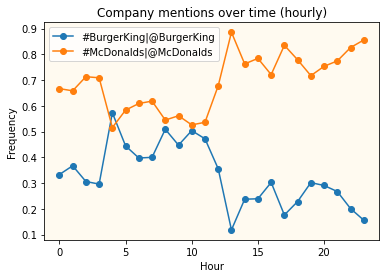

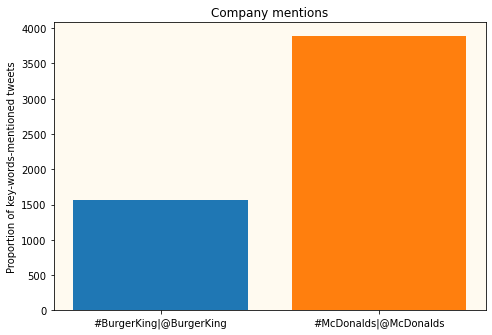

<ipython-input-206-a33e3fe4e520>:75: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.axes()


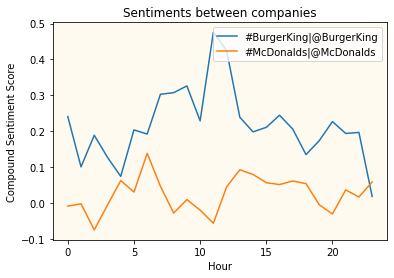

In [207]:
my_table = read_Tweet(['food1.json','food2.json','food3.json','food4.json','food5.json', 'food6.json'])
word_mention_checking(['#BurgerKing|@BurgerKing','#McDonalds|@McDonalds'], my_table)
sentiment_analysis(['#BurgerKing|@BurgerKing','#McDonalds|@McDonalds'], my_table)